In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../../../data/National_education_cost/CP2-remastered.csv")
import warnings
warnings.filterwarnings("ignore")

df.drop("Unnamed: 9", axis=1, inplace=True)
df

,Year,National,Middle States,Midwest,New England,South,Southwest,West,UnivType
0,90-91,910.0,1400.0,1200.0,1360.0,710.0,600.0,410.0,Public Two Year
1,91-92,1170.0,1680.0,1290.0,1750.0,810.0,660.0,510.0,Public Two Year
2,92-93,1120.0,1820.0,1430.0,1870.0,920.0,690.0,620.0,Public Two Year
3,93-94,1250.0,1890.0,1500.0,2110.0,980.0,710.0,770.0,Public Two Year
4,94-95,1310.0,2000.0,1550.0,2200.0,990.0,750.0,780.0,Public Two Year
...,...,...,...,...,...,...,...,...,...
63,19-20,10440.0,11280.0,10970.0,13960.0,9590.0,9980.0,9880.0,Public four Year
64,20-21,10570.0,11330.0,11170.0,14310.0,9650.0,10300.0,10030.0,Public four Year
65,21-22,10750.0,11570.0,11430.0,14520.0,9760.0,10530.0,10120.0,Public four Year
66,22-23,10990.0,11840.0,11790.0,15000.0,9820.0,10660.0,10510.0,Public four Year


In [13]:
df.dtypes

Year              object
National         float64
Middle States    float64
Midwest          float64
New England      float64
South            float64
Southwest        float64
West             float64
UnivType          object
dtype: object

In [14]:
def replace_year(x):
    current = x[:2]
    if current[0] in ["8","9"]: return "19"+current
    else: return "20"+current
df['Year'] = df['Year'].apply(replace_year)

In [15]:
df

,Year,National,Middle States,Midwest,New England,South,Southwest,West,UnivType
0,1990,910.0,1400.0,1200.0,1360.0,710.0,600.0,410.0,Public Two Year
1,1991,1170.0,1680.0,1290.0,1750.0,810.0,660.0,510.0,Public Two Year
2,1992,1120.0,1820.0,1430.0,1870.0,920.0,690.0,620.0,Public Two Year
3,1993,1250.0,1890.0,1500.0,2110.0,980.0,710.0,770.0,Public Two Year
4,1994,1310.0,2000.0,1550.0,2200.0,990.0,750.0,780.0,Public Two Year
...,...,...,...,...,...,...,...,...,...
63,2019,10440.0,11280.0,10970.0,13960.0,9590.0,9980.0,9880.0,Public four Year
64,2020,10570.0,11330.0,11170.0,14310.0,9650.0,10300.0,10030.0,Public four Year
65,2021,10750.0,11570.0,11430.0,14520.0,9760.0,10530.0,10120.0,Public four Year
66,2022,10990.0,11840.0,11790.0,15000.0,9820.0,10660.0,10510.0,Public four Year


In [16]:
df['Year'] = pd.to_datetime(df['Year']).dt.year

In [17]:
df.isna().sum()

Year             0
National         0
Middle States    0
Midwest          0
New England      0
South            0
Southwest        0
West             0
UnivType         0
dtype: int64

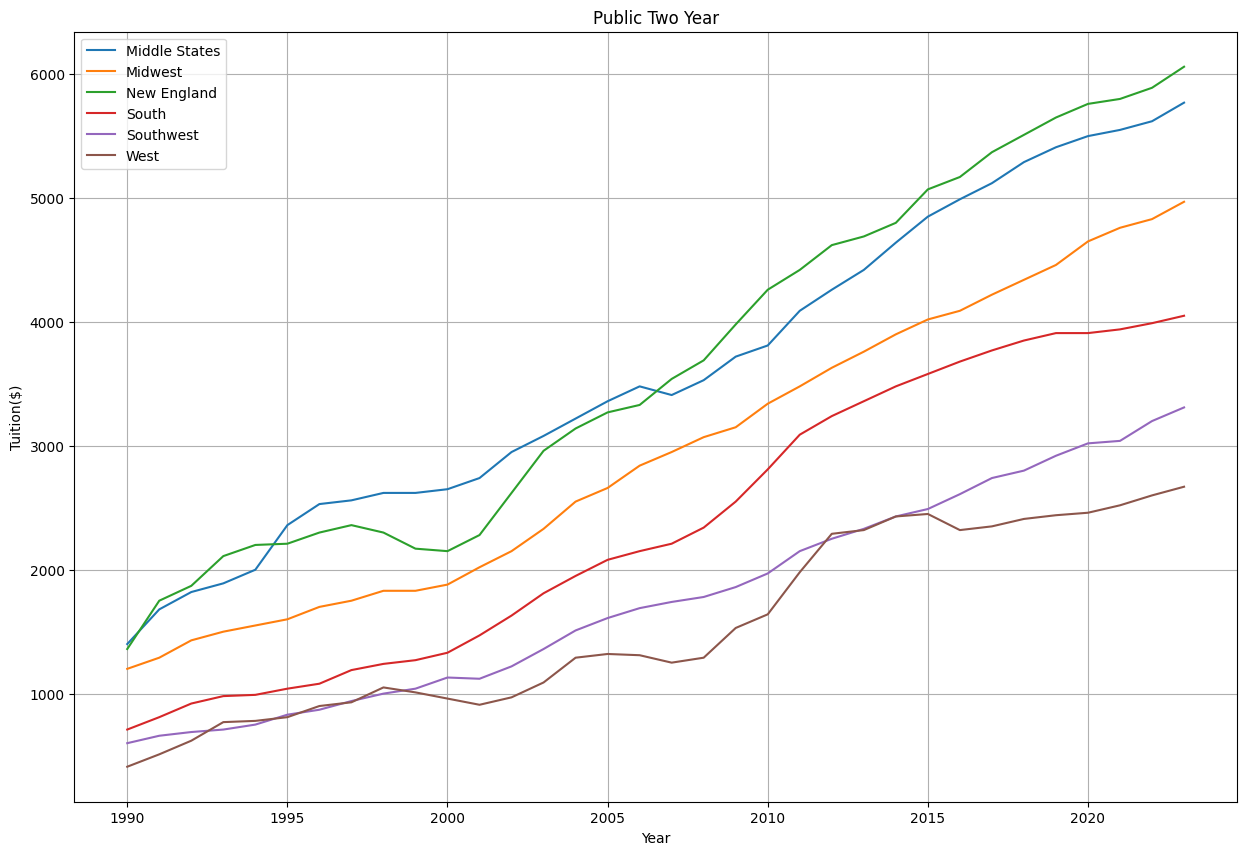

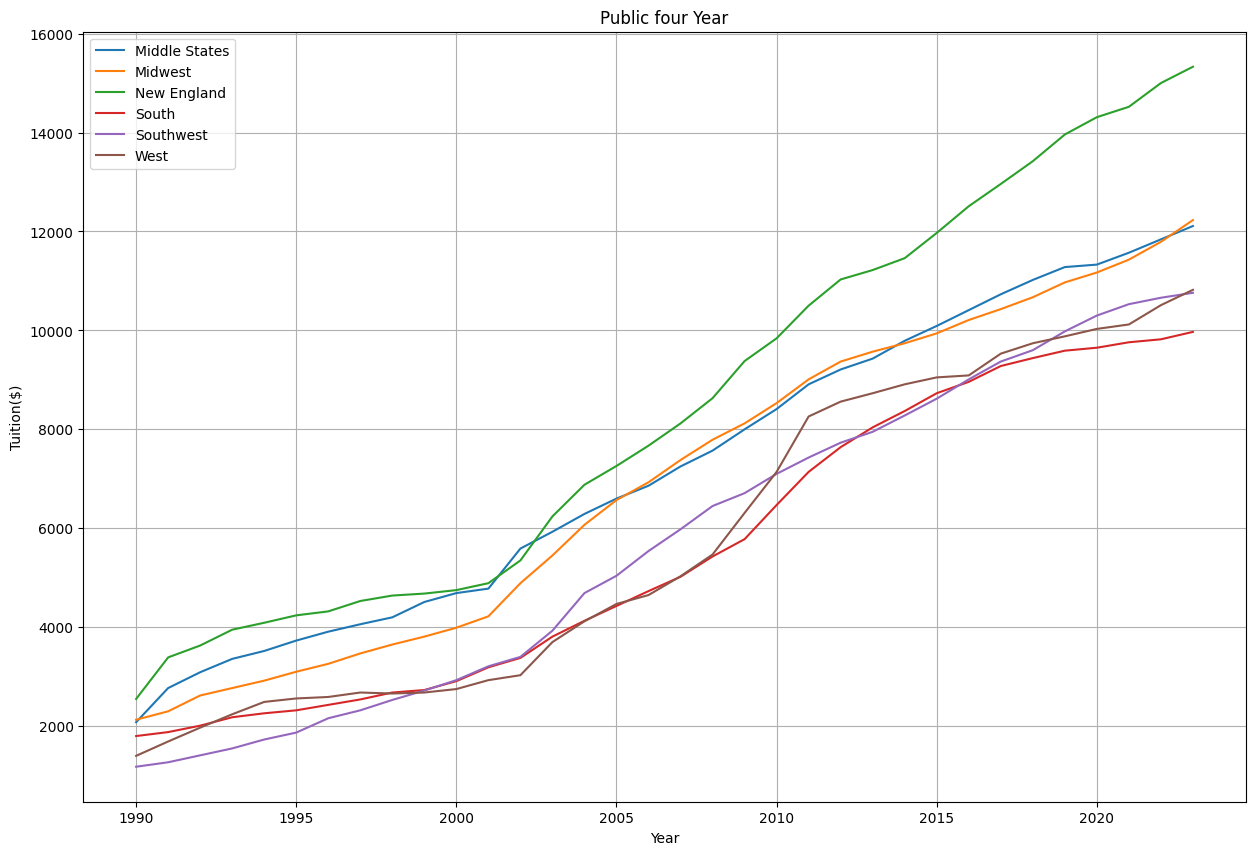

In [18]:
for univ in df['UnivType'].unique():
    temporary = df[df['UnivType']==univ]
    fig, ax = plt.subplots(figsize=(15,10))
    # print(temporary)

    for column in temporary.columns.to_list():
        
        if column not in  ["UnivType", "Year", "National"]:
            # print(column)
            sns.lineplot(data=temporary, x="Year", y=column, label=column)

    plt.xlabel('Year')
    plt.ylabel('Tuition($)')
    plt.title(univ)

    plt.grid()
    plt.legend()
    plt.show()




Public two year
- They all have an ascending trend over the year no matter the type of university
- New england seems to have the overall upper hand even though it started  by middle state at the beginning 
- Around 1997, we have a drop down in tuition for New england and an increase that restarted around 2000
- The midwest and southwest on the other hand has the most stable tuition rate increase
- for the south, we had frequent dips and increase from 1995 to 2017 and from then, a pretty stable tuition rate increase.
- middle state observed a great increase 1994 that put it in front of new england which underwent a dips at that time. this stiuation is kept constant until 2007 where new england retake the place of the highest tuition rate.

Public four year
- all 6 of them observed a stable growth rate till arount 2000
the growth rate of new england has peaked around 2000.
- the 3 most expesnive region seems to have started their pick in 2001 and the three other observed that peak in 2002
- 

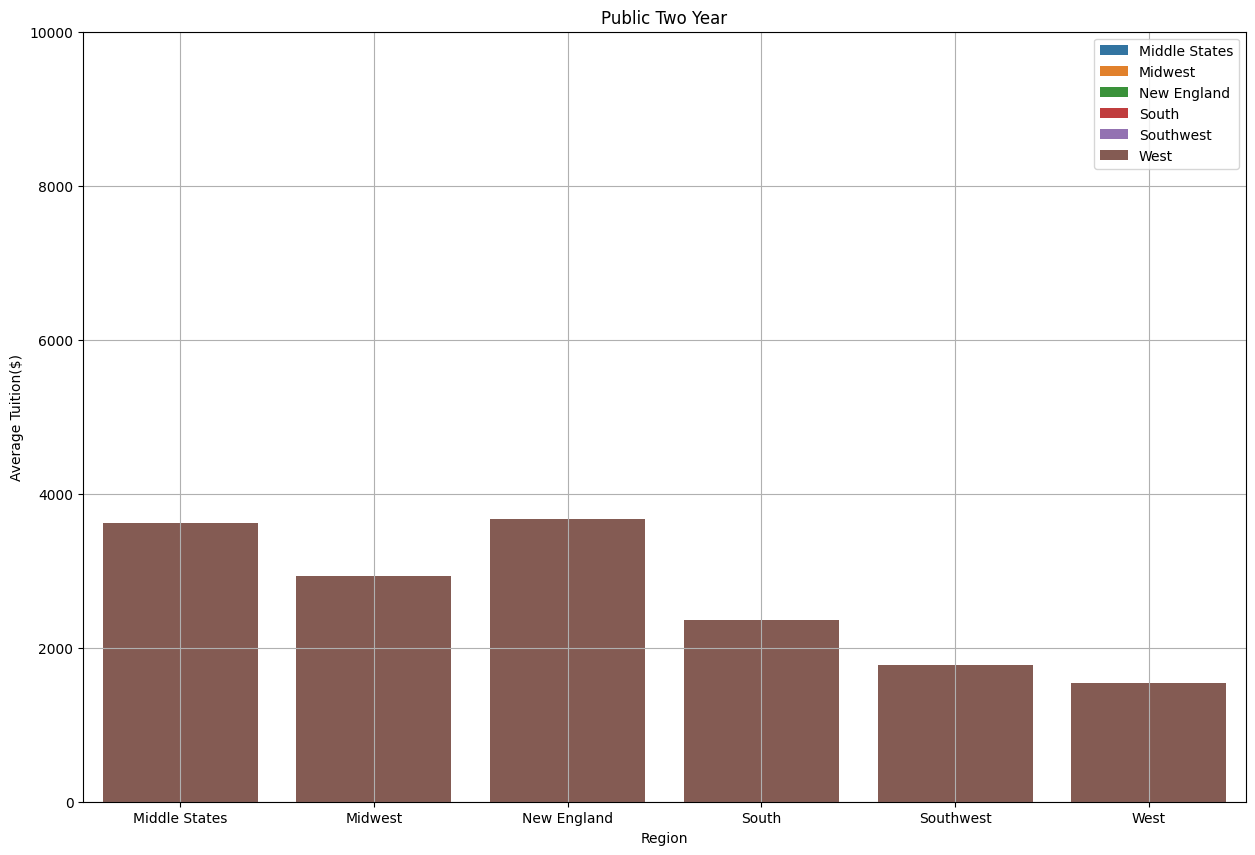

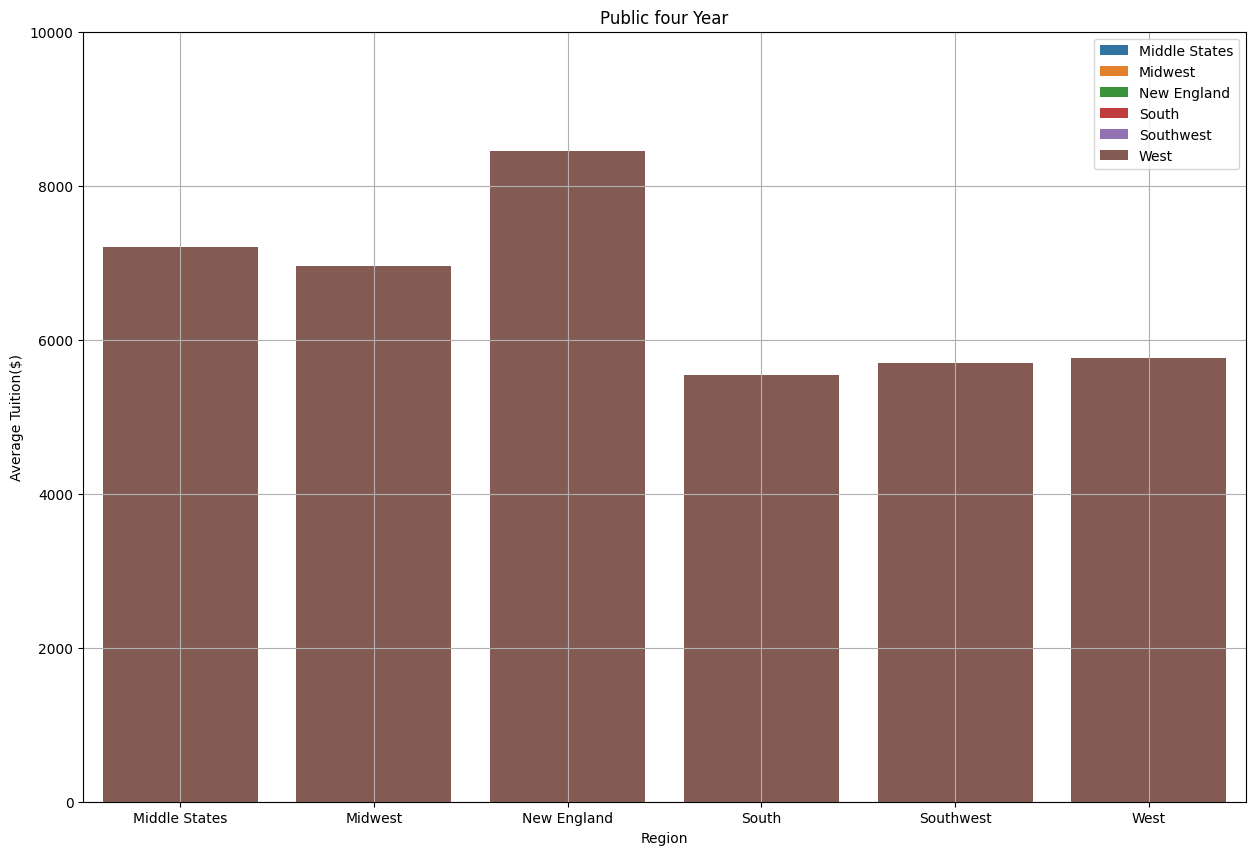

In [19]:
for univ in df['UnivType'].unique():
    temporary = df[df['UnivType']==univ]
    fig, ax = plt.subplots(figsize=(15,10))
    # print(temporary)
    columns=[]
    column_mean_list = []
    for column in temporary.columns.to_list():
        
        if column not in  ["UnivType", "Year", "National"]:
            columns+=[column]
            column_mean = temporary[column].mean()
            column_mean_list+=[column_mean]
            # print(column)
            sns.barplot(x=columns, y=column_mean_list, label=column)

    plt.xlabel('Region')
    plt.ylabel('Average Tuition($)')
    plt.title(univ)
    plt.ylim(0, 10000)
    plt.grid()
    # plt.legend()
    plt.show()




Comparison between average prices of the 2 year and 4 year.
- On average, New England is the highest in both the Public 2 year and 4 year categories.

- The southwest, on average, is half the price of both the middle states and new england.

- Oddly enough, almost all of them double in price for being the full 4 year colleges in all reigons of the world, except the south, southwest, and the west, which exhibited either a 2.5x (south), or more than 3x more on average tuition.

- New England again, is on top of the average tuition.

- The lowest in the four year now is the south, rather than the west in the 2 year.



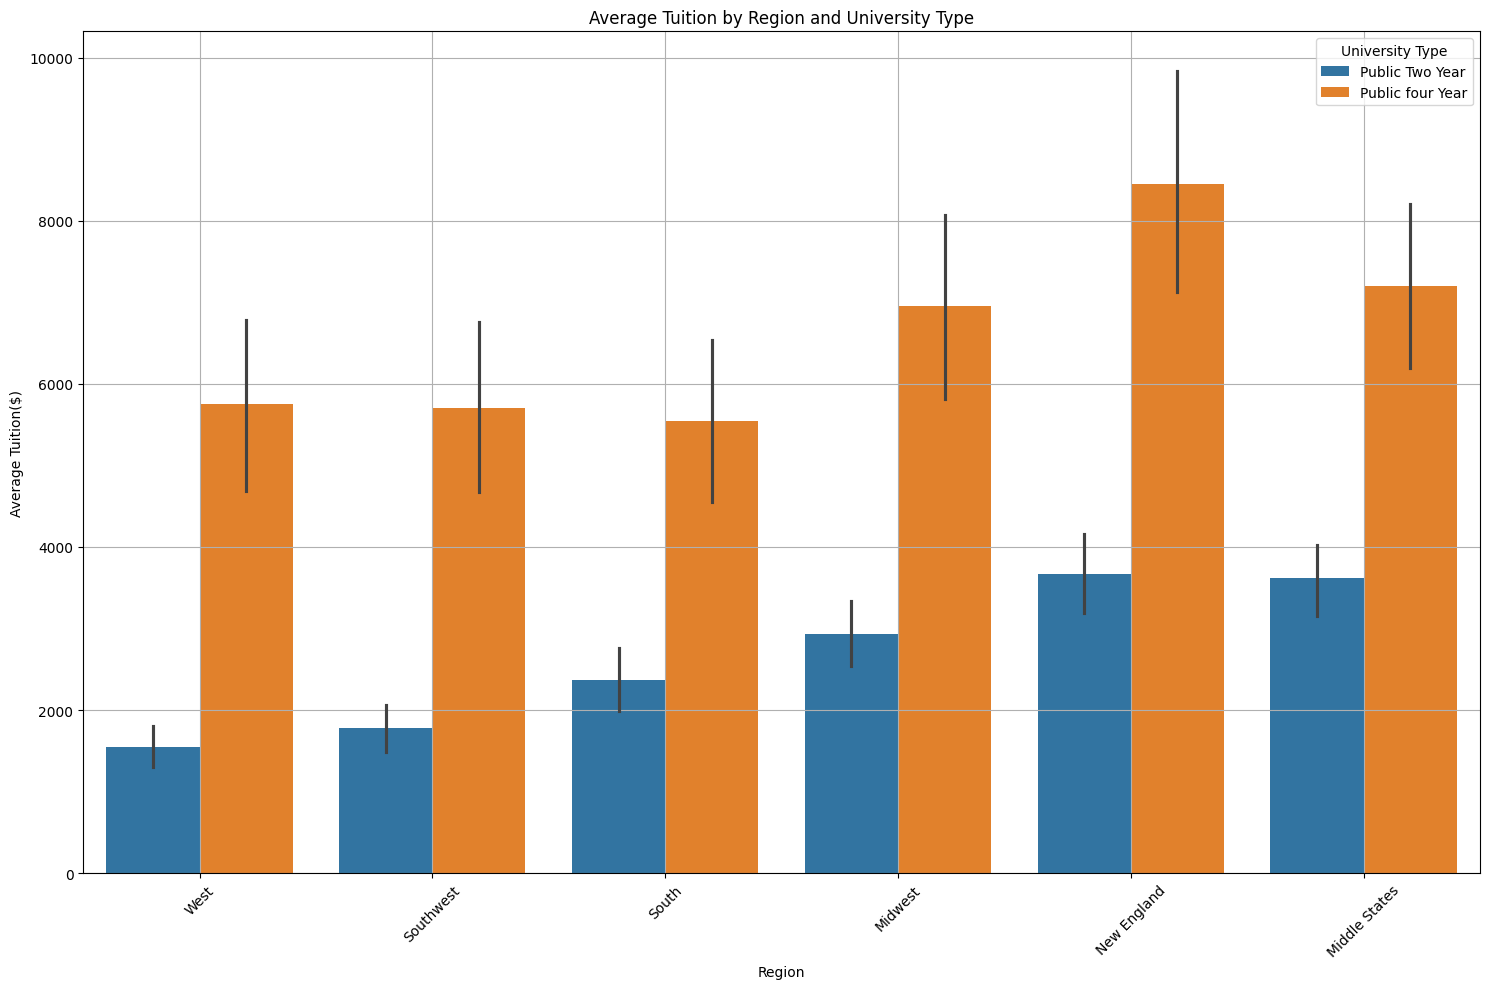

In [20]:
columns_to_melt = [col for col in df.columns if col not in ['UnivType', 'Year', 'National']]
melted_df = df.melt(id_vars=['UnivType'],value_vars=columns_to_melt,  var_name='Region', value_name='Average Tuition($)')


plt.figure(figsize=(15,10))
sns.barplot(data=melted_df.sort_values(by='Average Tuition($)'), x='Region', y='Average Tuition($)', hue='UnivType')
plt.xlabel('Region')
plt.ylabel('Average Tuition($)')
plt.title('Average Tuition by Region and University Type')
plt.grid()
plt.legend(title='University Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [21]:
import plotly.express as px

for univ in df['UnivType'].unique():
    temporary = df[df['UnivType'] == univ]
    columns = [col for col in temporary.columns.to_list() if col not in ["UnivType", "Year", "National"]]
    fig = px.line(temporary, x="Year", y=columns, title=univ, labels={'Year': 'Year', 'value': 'Tuition($)'},  width=900, height=700)
    fig.update_layout(xaxis_title='Year', yaxis_title='Tuition($)', legend_title='')
    fig.show()
    fig.write_html(f"../../../graphs/html/two/two-{univ}.html")
